<a href="https://colab.research.google.com/github/RongerYang/Prediction_of_Online_Purchasing_Intention/blob/main/INF2190.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF2190 - Project
## Prediction of Online Purchasing Intention
Jielin Jiang, 1008615278 <br>
Toby Liang, 1003551364 <br>
Tiancheng Sheng, 1007429819 <br>
Ronger Yang, 1003010635 <br>

In [ ]:
import pandas as pd 
import numpy as np

import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier #The algorithm
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split #Train and test split function
from sklearn import metrics #To calculate model accuracy
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
print(dataset.shape)
dataset.head()

(12330, 18)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
# dataset['Month'] = dataset['Month'].astype('category')
# dataset['VisitorType'] = dataset['VisitorType'].astype('category')
# dataset['Weekend'] = dataset['Weekend'].astype('category')
# dataset['Revenue'] = dataset['Revenue'].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

One-hot Encoding

In [ ]:
dummy_df = pd.get_dummies(dataset)
dummy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12330 non-null  int64  
 1   Administrative_Duration        12330 non-null  float64
 2   Informational                  12330 non-null  int64  
 3   Informational_Duration         12330 non-null  float64
 4   ProductRelated                 12330 non-null  int64  
 5   ProductRelated_Duration        12330 non-null  float64
 6   BounceRates                    12330 non-null  float64
 7   ExitRates                      12330 non-null  float64
 8   PageValues                     12330 non-null  float64
 9   SpecialDay                     12330 non-null  float64
 10  TrafficType                    12330 non-null  int64  
 11  Weekend                        12330 non-null  bool   
 12  Revenue                        12330 non-null 

# EDA


In [ ]:
sns.set_theme(style="darkgrid")

### Distribution of 

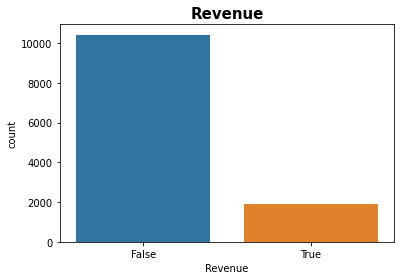

In [51]:
# colors = sns.color_palette('pastel')[0:5]
plt.figure()
sns.countplot(data=dataset, x='Revenue')
plt.title('Revenue', fontsize=15, fontweight='bold')
plt.show()

In [52]:
operating_system = {1 : "IOS", 2 : "Android Mobile", 3 : "Windows", 4 : "Linux", 
                    5 : "MS-DOS", 6 : "Fedora", 7 : "Ubuntu", 8: "Solaris"}

browser = {1 : "Firefox", 2 : "Google Chrome", 3 : "Microsoft Edge", 4 : "Apple Safari", 
           5 : "Opera", 6 : "Brave", 7 : "UCBrowser", 8: "DuckDuckgo",
           9 : "Chromium", 10 : "Epic", 11 : "Internet Explorer", 12: "Tor Browser",
           13 : "Maxthon"}

region = {1 : "China", 2 : "Indonesia", 3 : "India", 4 : "United States", 
          5 : "Brazil", 6 : "Nigeria", 7 : "Japan", 8: "Russia",
          9 : "Bangladesh"}

dataset.OperatingSystems = dataset.OperatingSystems.map(operating_system)
dataset.Browser = dataset.Browser.map(browser)
dataset.Region = dataset.Region.map(region)

IndexError: ignored

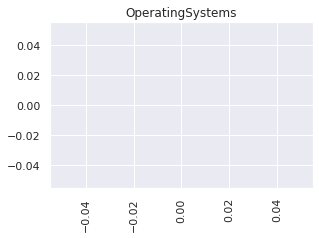

In [ ]:
fig = plt.figure(figsize=(16, 14))
fig.subplots_adjust(hspace=0.8)

plt.subplot(331) 
dataset.OperatingSystems.value_counts().plot.bar(title='OperatingSystems')

plt.subplot(332) 
dataset.Browser.value_counts().plot.bar(title='Browser')

plt.subplot(333)
dataset.Region.value_counts().plot.bar(title='Region') 

plt.subplot(334)
dataset['TrafficType'].value_counts(normalize=True).plot.bar(title='TrafficType')

plt.subplot(335) 
dataset['Month'].value_counts(normalize=True).plot.bar(title= 'Months')

plt.subplot(336) 
dataset['VisitorType'].value_counts(normalize=True).plot.bar(title= 'VisitorType')

plt.subplot(337) 
dataset['Weekend'].value_counts(normalize=True).plot.bar(title= 'Weekend')
plt.show()

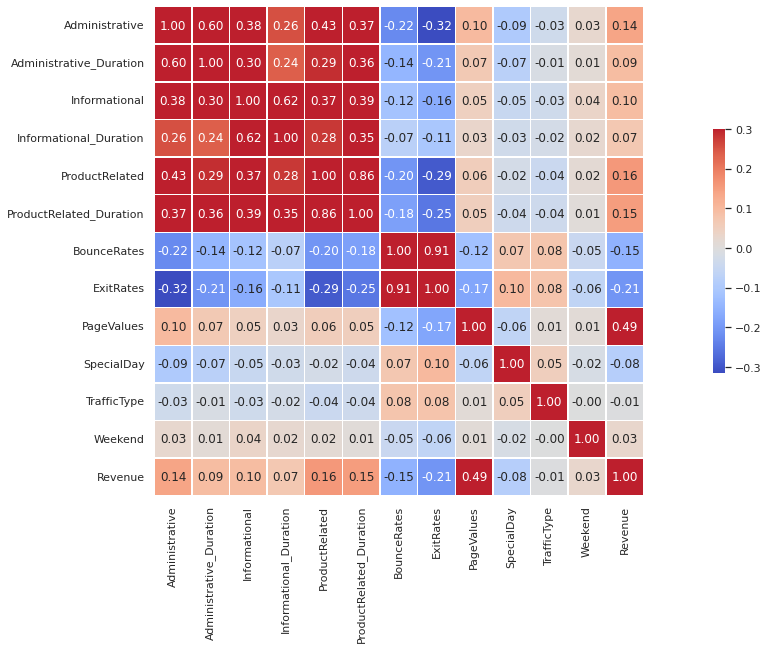

In [ ]:
# Correlation Matrix
corr = dataset.corr()
g = sns.heatmap(corr, 
                vmax=.3, center=0,
                square=True, linewidths=.5, 
                cbar_kws={"shrink": .5}, annot=True, 
                fmt='.2f', cmap='coolwarm')
g.figure.set_size_inches(25,9)
plt.show()

# Train-Test Split & Data Balancing

In [ ]:
X = dummy_df.drop('Revenue', axis=1)

# separate target values
y = dummy_df.Revenue

# The full dataset is randomly divided into the "train" and "test" sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1) #80% training and 20% test

from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")



Training target statistics: Counter({False: 8307, True: 1557})
Testing target statistics: Counter({False: 2115, True: 351})


In [12]:
# Not suitable for k-fold cv train-test split, Only suitable for single fold

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_res, y_res = smote.fit_resample(X,y)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)))

After OverSampling, the shape of train_X: (20844, 28)
After OverSampling, the shape of train_y: (20844,) 

After OverSampling, counts of label '1': 10422
After OverSampling, counts of label '0': 10422


In [30]:
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size =0.2)

print(f"Training target statistics: {Counter(y_train_res)}")
print(f"Testing target statistics: {Counter(y_test_res)}")

Training target statistics: Counter({True: 8350, False: 8325})
Testing target statistics: Counter({False: 2097, True: 2072})


## KNN

### KNN with k-fold CV

In [42]:
# Balancing dataset
X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
# enumerate the splits and summarize the distributions
for train_ix, test_ix in kfold.split(X, y):
  train_X, test_X = X[train_ix], X[test_ix]
  train_y, test_y = y[train_ix], y[test_ix]

  train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
  test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
  print('>Train set: Flase=%d, True=%d, Test set: Flase=%d, True=%d' % (train_0, train_1, test_0, test_1))


>Train set: Flase=4932, True=4932, Test set: Flase=1233, True=1233
>Train set: Flase=4932, True=4932, Test set: Flase=1233, True=1233
>Train set: Flase=4932, True=4932, Test set: Flase=1233, True=1233
>Train set: Flase=4932, True=4932, Test set: Flase=1233, True=1233
>Train set: Flase=4932, True=4932, Test set: Flase=1233, True=1233


Text(0, 0.5, 'Error')

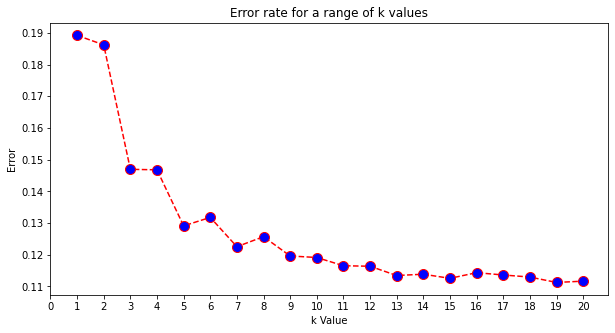

In [43]:

error = []

#Calculating error for K values between 1 and 20
for i in range(1, 21):
  e = []
  for train_ix, test_ix in kfold.split(X, y):
    train_X, test_X = X[train_ix], X[test_ix]
    train_y, test_y = y[train_ix], y[test_ix]

    knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
    knn.fit(train_X, train_y)
    pred_i = knn.predict(test_X)
    e.append(np.mean(pred_i != test_y))

  error.append(sum(e) / len(e))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate for a range of k values')
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('k Value')
plt.ylabel('Error')

In [44]:
accuracy_knn_kfold = []
precision_knn_kfold = []
f1score_knn_kfold = []

min_neighbours = error.index(min(error), 0, len(error)) + 1

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]

  knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=min_neighbours)
  knn.fit(train_X, train_y)
  y_pred = knn.predict(test_X)
  accuracy_knn_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_knn_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_knn_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_knn_kfoldmean = np.mean(accuracy_knn_kfold) * 100
print("Accuracy for K-NN with K-fold CV: %.3f" % (accuracy_knn_kfoldmean))
precision_knn_kfoldmean = np.mean(precision_knn_kfold) * 100
print("Precision for K-NN with K-fold CV: %.3f" % (precision_knn_kfoldmean))
f1score_knn_kfoldmean = np.mean(f1score_knn_kfold) * 100
print("F1-score for K-NN with K-fold CV: %.3f" % (f1score_knn_kfoldmean))


Accuracy for K-NN with K-fold CV: 88.873
Precision for K-NN with K-fold CV: 89.169
F1-score for K-NN with K-fold CV: 88.831


### Single KNN

Text(0, 0.5, 'Error')

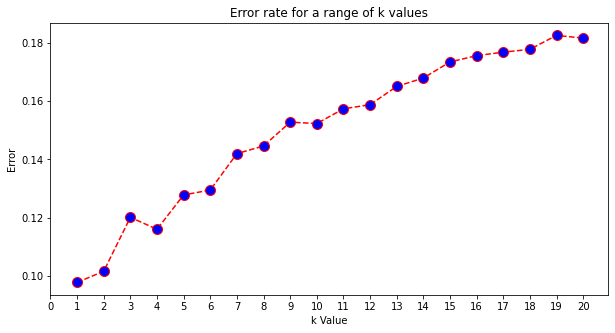

In [17]:

error = []

#Calculating error for K values between 1 and 20
for i in range(1, 21):
    knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors=i)
    knn.fit(X_train_res, y_train_res)
    pred_i = knn.predict(X_test_res)
    error.append(np.mean(pred_i != y_test_res))

plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error rate for a range of k values')
plt.xticks(np.arange(0, 21, 1.0))
plt.xlabel('k Value')
plt.ylabel('Error')

In [18]:
# KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, metric='manhattan')

# train KNN model
model.fit(X_train_res,y_train_res)
y_pred = model.predict(X_test_res)
kn_train = model.score(X_train_res, y_train_res)
kn_test = model.score(X_test_res, y_test_res)
kn_test

0.9018949388342529

In [19]:
accuracy_knn = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for XGBClassifier: %.3f" % (accuracy_knn))
precision_knn = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for XGBClassifier: %.3f" % (precision_knn))
f1score_knn = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for XGBClassifier: %.3f" % (f1score_knn))

Accuracy for XGBClassifier: 90.189
Precision for XGBClassifier: 88.423
F1-score for XGBClassifier: 90.565


Text(0.5, 257.44, 'Predicted label')

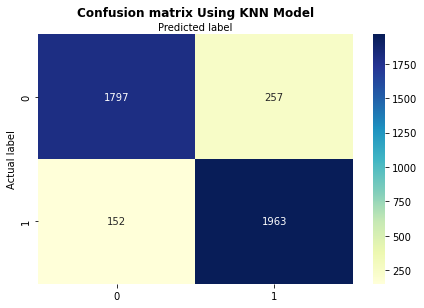

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using KNN Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# SVC

### SVC with K-fold CV

In [47]:
accuracy_svc_kfold = []
precision_svc_kfold = []
f1score_svc_kfold = []

X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]
  svc = SVC()
  svc.fit(train_X, train_y)
  y_pred = svc.predict(test_X)

  accuracy_svc_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_svc_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_svc_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_svc_kfoldmean = np.mean(accuracy_svc_kfold) * 100
print("Accuracy for SVC with K-fold CV: %.3f" % (accuracy_svc_kfoldmean))
precision_svc_kfoldmean = np.mean(precision_svc_kfold) * 100
print("Precision for SVC with K-fold CV: %.3f" % (precision_svc_kfoldmean))
f1score_svc_kfoldmean = np.mean(f1score_svc_kfold) * 100
print("F1-score for SVC with K-fold CV: %.3f" % (f1score_svc_kfoldmean))



Accuracy for SVC with K-fold CV: 90.073
Precision for SVC with K-fold CV: 90.576
F1-score for SVC with K-fold CV: 90.011


### Single SVC

In [48]:
# SVC
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_res, y_train_res)
y_pred = svc.predict(X_test_res)
sv_train = svc.score(X_train_res, y_train_res)
sv_test = svc.score(X_test_res, y_test_res)
sv_test

0.7287119213240585

In [38]:
accuracy_svc = 100 * metrics.accuracy_score(y_test_res, y_pred)
print("Accuracy for SVC: %.3f" % (accuracy_svc))
precision_svc = 100 * metrics.precision_score(y_test_res, y_pred)
print("Precision for SVC: %.3f" % (precision_svc))
f1score_svc = 100 * metrics.f1_score(y_test_res, y_pred)
print("F1-score for SVC: %.3f" % (f1score_svc))

Accuracy for SVC: 72.871
Precision for SVC: 72.100
F1-score for SVC: 73.078


Text(0.5, 257.44, 'Predicted label')

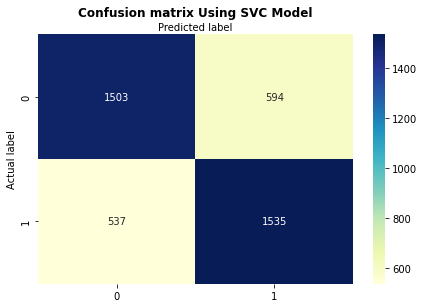

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using SVC Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Random Forest

In [ ]:
param_rf = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_rf, 
                          cv = 3, n_jobs = -1, verbose = 2)

print(grid_search.best_estimator_)

In [ ]:
clf_rf = RandomForestClassifier() # TODO
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

rf_train = clf_rf.score(X_train, y_train)
rf_test = clf_rf.score(X_test, y_test)

In [ ]:
accuracy_rf = 100 * metrics.accuracy_score(y_test, y_pred_rf)
print("Accuracy for Random Forest: %.3f" % (accuracy_rf))
precision_rf = 100 * metrics.precision_score(y_test, y_pred_rf)
print("Precision for Random Forest: %.3f" % (precision_rf))
f1score_rf = 100 * metrics.f1_score(y_test, y_pred_rf)
print("F1-score for Random Forest: %.3f" % (f1score_rf))

## Gradient Boosting Decision Tree

In [ ]:
from datetime import datetime
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\nTime taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


params = {
        'min_child_weight': [1, 5, 10],
        # 'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        # 'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 8, 12],
        'n_estimators': [500, 1000, 1500, 2000],
        'learning_rate': [0.02, 0.1, 0.2]
        }
xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 0)

search = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', 
                      cv=skf.split(X_train,y_train), verbose=3, refit=True)

start_time = timer(None)
search.fit(X_train, y_train)
timer(start_time)
print("Best parameters:", search.best_params_)
print("Best score:", search.best_score_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.925 total time=   3.8s
[CV 2/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.938 total time=   3.8s
[CV 3/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.6;, score=0.931 total time=   3.8s
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.926 total time=   3.5s
[CV 2/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.938 total time=   3.4s
[CV 3/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8;, score=0.931 total time=   3.4s
[CV 1/3] END learning_rate=0.02, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0;, score=0.926 total time=   2.9s
[CV 2/3] END learnin

### XGBClassification with K-Fold CV

In [49]:
accuracy_xgb_kfold = []
precision_xgb_kfold = []
f1score_xgb_kfold = []

X, y = make_classification(n_samples=12330, n_classes=2, weights=[0.50, 0.50], flip_y=0, random_state=0)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

for train_x, test_x in kfold.split(X, y):
  train_X, test_X = X[train_x], X[test_x]
  train_y, test_y = y[train_x], y[test_x]
  xgb = XGBClassifier(n_estimators=500, random_state=0, max_depth=3, learning_rate=0.02, min_child_weight=1, subsample=0.8)
  xgb.fit(train_X, train_y)
  y_pred = xgb.predict(test_X)
  accuracy_xgb_kfold.append(metrics.accuracy_score(test_y, y_pred))
  precision_xgb_kfold.append(metrics.precision_score(test_y, y_pred))
  f1score_xgb_kfold.append(metrics.f1_score(test_y, y_pred))

accuracy_xgb_kfoldmean = np.mean(accuracy_xgb_kfold) * 100
print("Accuracy for XGBClassifier with K-fold CV: %.3f" % (accuracy_xgb_kfoldmean))
precision_xgb_kfoldmean = np.mean(precision_xgb_kfold) * 100
print("Precision for XGBClassifier with K-fold CV: %.3f" % (precision_xgb_kfoldmean))
f1score_xgb_kfoldmean = np.mean(f1score_xgb_kfold) * 100
print("F1-score for XGBClassifier with K-fold CV: %.3f" % (f1score_xgb_kfoldmean))



Accuracy for XGBClassifier with K-fold CV: 91.103
Precision for XGBClassifier with K-fold CV: 90.093
F1-score for XGBClassifier with K-fold CV: 91.216


Single XGBClassification

In [32]:

xgb = XGBClassifier(n_estimators=500, random_state=0, max_depth=3, learning_rate=0.02, min_child_weight=1, subsample=0.8)
xgb.fit(X_train_res, y_train_res)
y_pred_res = xgb.predict(X_test_res)
xgb_train = xgb.score(X_train_res, y_train_res)
xgb_test = xgb.score(X_test_res, y_test_res)

accuracy_xgbc = 100 * metrics.accuracy_score(y_test_res, y_pred_res)
print("Accuracy for XGBClassifier: %.3f" % (accuracy_xgbc))
precision_xgbc = 100 * metrics.precision_score(y_test_res, y_pred_res)
print("Precision for XGBClassifier: %.3f" % (precision_xgbc))
f1score_xgbc = 100 * metrics.f1_score(y_test_res, y_pred_res)
print("F1-score for XGBClassifier: %.3f" % (f1score_xgbc))



Accuracy for XGBClassifier: 92.348
Precision for XGBClassifier: 91.958
F1-score for XGBClassifier: 92.334


Text(0.5, 257.44, 'Predicted label')

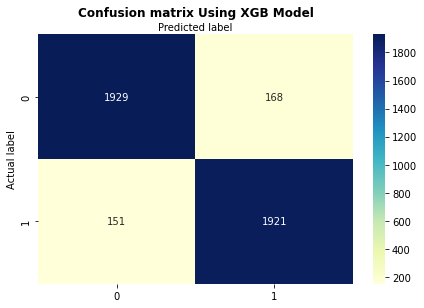

In [33]:
cnf_matrix = metrics.confusion_matrix(y_test_res, y_pred_res)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix Using XGB Model', y=1.1, fontweight='bold')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


# Model Comparison

In [50]:
data = {'Algorithms':['K-NN', 'K-NN + k-fold', 'SVC', 'SVC + k-fold', 'XGBClassifier', 'XGBClassifier + k-fold'], 
        'Accuracy':[accuracy_knn, accuracy_knn_kfoldmean, accuracy_svc, accuracy_svc_kfoldmean, accuracy_xgbc, accuracy_xgb_kfoldmean],
        'Precision':[precision_knn, precision_knn_kfoldmean, precision_svc, precision_svc_kfoldmean, precision_xgbc, precision_xgb_kfoldmean],
        'F1 Score':[f1score_knn, f1score_knn_kfoldmean, f1score_svc, f1score_svc_kfoldmean, f1score_xgbc, f1score_xgb_kfoldmean]}
 
# Calling DataFrame constructor
models = pd.DataFrame(data)
 
models

,Algorithms,Accuracy,Precision,F1 Score
0,K-NN,90.189494,88.423423,90.565167
1,K-NN + k-fold,88.872668,89.168954,88.830736
2,SVC,72.871192,72.099577,73.077839
3,SVC + k-fold,90.072993,90.575714,90.010689
4,XGBClassifier,92.348285,91.957875,92.333574
5,XGBClassifier + k-fold,91.103001,90.092995,91.215533
